In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from PIL import Image
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
# import the MNIST Data from keras.datasets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Training Data = 60.000
Test Data= 10.000

Image dimension -->28 * 28
Channels --> 1 channel (gray scale)

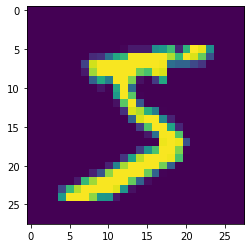

5


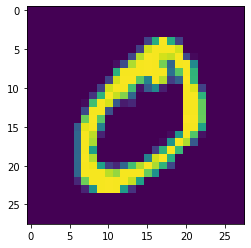

0


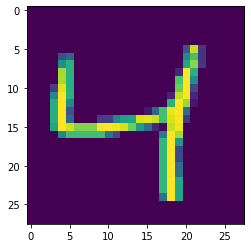

4


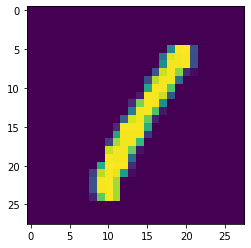

1


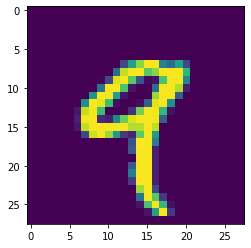

9


In [9]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [10]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255


In [11]:
# Build the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4142 - accuracy: 0.7749
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4485 - accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3855 - accuracy: 0.9042
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3486 - accuracy: 0.9113
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3083 - accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.9289
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9337
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2314 - accuracy: 0.9381
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2170 - accuracy: 0.9424
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.191

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.2307 - accuracy: 0.9443


0.9442999958992004

In [15]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [17]:
predicted_labels=[np.argmax(i) for i in y_pred]

In [18]:
conf_mat =confusion_matrix(y_test,predicted_labels)

Text(0.5, 51.0, 'Predicted labels')

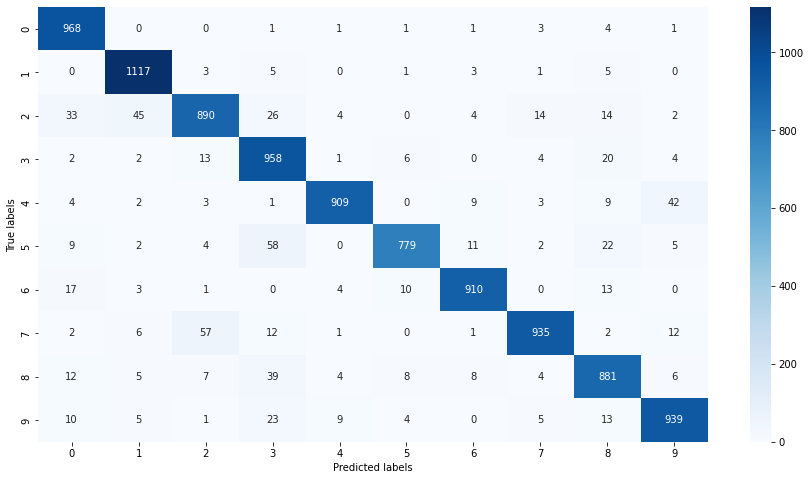

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="Blues")
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
